In [3]:
from selenium import webdriver
from time import sleep
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
import pandas as pd

In [134]:
artist_df = pd.read_csv('artists.csv')
artists = artist_df['artists'].tolist()

In [39]:
len(artists)

161

In [24]:
artists[:10]

['Drake',
 'Ed Sheeran',
 'Drake',
 'Drake',
 'Juice WRLD',
 'Post Malone',
 'Ella Mai',
 'Dua Lipa',
 'XXXTENTACION',
 'Camila Cabello']

In [40]:
# Remove duplicates
artists = list(dict.fromkeys(artists))

In [41]:
len(artists)

102

# Crawling

In [98]:
path=r'../shoppingmall/chromedriver'
driver=webdriver.Chrome(path)
driver.get("https://www.famousbirthdays.com/")

In [ ]:
b_dates = []

In [128]:
for a in artists:
    try:
        search = driver.find_element_by_xpath("//*[@id='fb_search']/input")
        search.send_keys(Keys.CONTROL + "a")
        search.clear()
        
        # Enter search term
        search.send_keys(a);
        
        # Click search button
        driver.find_element_by_xpath("//*[@id='fb_search']/button").click()
        
        # Get birth date    
        b_dates.append(a + ", " + driver.find_element_by_class_name("stat").text)
        
    except NoSuchElementException:
        b_dates.append(a + ", Null")

In [361]:
b_dates[:10]

['Drake, October 24',
 'Drake, BIRTHDAY\nOctober 24, 1986',
 'Ed Sheeran, BIRTHDAY\nFebruary 17, 1991',
 'Juice WRLD, BIRTHDAY\nDecember 2, 1998',
 'Post Malone, BIRTHDAY\nJuly 4, 1995',
 'Ella Mai, BIRTHDAY\nNovember 3, 1994',
 'Dua Lipa, BIRTHDAY\nAugust 22, 1995',
 'XXXTENTACION, BIRTHDAY\nJanuary 23, 1998',
 'Camila Cabello, BIRTHDAY\nMarch 3, 1997',
 'Ariana Grande, BIRTHDAY\nJune 26, 1993']

# Result

In [44]:
b_dates_df = pd.read_csv('b_dates.csv')

In [45]:
b_dates_df.head()

,artists,b_dates,ages
0,Drake,"October 24, 1986",32.0
1,Ed Sheeran,"February 17, 1991",28.0
2,Juice WRLD,"December 2, 1998",20.0
3,Post Malone,"July 4, 1995",24.0
4,Ella Mai,"November 3, 1994",24.0


In [64]:
b_dates_df.dtypes

artists    object
b_dates    object
ages       object
dtype: object

In [25]:
len(b_dates_df)

102

In [46]:
b_dates_df['ages'] = b_dates_df['ages'].astype(str)

In [47]:
# Sort nan first
b_dates_df.sort_values(by='ages', ascending=False, na_position='first').head()

,artists,b_dates,ages
17,5 Seconds Of Summer,NaN,nan
36,Florida Georgia Line,NaN,nan
98,Rae Sremmurd,NaN,nan
29,Maroon 5,NaN,nan
92,N*E*R*D,Null,nan


In [48]:
b_dates_nan = b_dates_df.loc[b_dates_df['ages'] == 'nan']

In [49]:
len(b_dates_nan)

12

In [50]:
# bands
b_dates_nan

,artists,b_dates,ages
10,Imagine Dragons,NaN,nan
14,Dan + Shay,NaN,nan
15,Portugal. The Man,NaN,nan
17,5 Seconds Of Summer,NaN,nan
22,Migos,NaN,nan
29,Maroon 5,NaN,nan
36,Florida Georgia Line,NaN,nan
50,Grey,Null,nan
72,MAX,Null,nan
86,Bastille,NaN,nan


In [51]:
df_without_nan = b_dates_df.drop(b_dates_df[b_dates_df.ages == 'nan'].index)

In [52]:
# df_band = b_dates_df.drop(b_dates_df[b_dates_df.ages != 'null'].index)

In [63]:
df_without_nan.head()

,artists,b_dates,ages
0,Drake,"October 24, 1986",32
1,Ed Sheeran,"February 17, 1991",28
2,Juice WRLD,"December 2, 1998",20
3,Post Malone,"July 4, 1995",24
4,Ella Mai,"November 3, 1994",24


In [62]:
df_without_nan.sort_values(by='ages', ascending=True).head()

,artists,b_dates,ages
20,Lil Pump,"August 17, 2000",18
38,YoungBoy Never Broke Again,"October 20, 1999",19
2,Juice WRLD,"December 2, 1998",20
32,Khalid,"February 11, 1998",21
21,Shawn Mendes,"August 8, 1998",21


In [61]:
df_without_nan.sort_values(by='ages', ascending=True).tail()

,artists,b_dates,ages
39,Daddy Yankee,"February 3, 1977",42
33,Jason Aldean,"February 28, 1977",42
76,DJ Khaled,"November 26, 1975",43
99,Juicy J,"April 5, 1975",44
37,Kenny Chesney,"March 26, 1968",51


In [57]:
# 18.0 -> 18
df_without_nan['ages'] = pd.to_numeric(df_without_nan['ages'], downcast='signed')

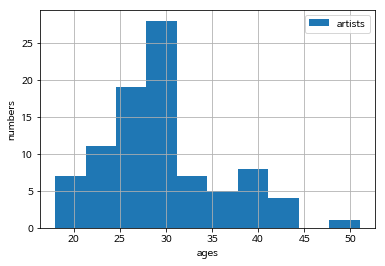

In [58]:
import matplotlib
from matplotlib import pyplot as plt

bins = 10

plt.hist(list(df_without_nan['ages']), alpha = 1, label='artists')

plt.xlabel('ages')
plt.ylabel('numbers')
plt.grid()


plt.legend(loc='upper right')

plt.show()

### Codes used in preprocessing (the order is random)

In [362]:
# Make df from two lists
b_dates_df_ages = pd.DataFrame({'artists':artists, 'b_dates':b_dates_only_dates})

In [324]:
# Manually fill in missing values
b_dates_df_ages.loc[b_dates_df_ages['artists'] == 'Khalid', 'b_dates'] = 'February 11, 1998'
b_dates_df_ages.loc[b_dates_df_ages['artists'] == 'Anne-Marie', 'b_dates'] = 'April 7, 1991'
b_dates_df_ages.loc[b_dates_df_ages['artists'] == 'Miguel', 'b_dates'] = 'October 23, 1985'
b_dates_df_ages.loc[b_dates_df_ages['artists'] == 'Darell', 'b_dates'] = 'January 5, 1990'
b_dates_df_ages.loc[b_dates_df_ages['artists'] == 'Ozuna', 'b_dates'] = 'March 13, 1992'
b_dates_df_ages.loc[b_dates_df_ages['artists'] == 'Lauv', 'b_dates'] = 'August 8, 1994'

In [165]:
# Eliminate unnecessary string parts
b_dates_preprocessing = [i.replace('BIRTHDAY\n', '') for i in b_dates]
b_dates_preprocessing = [i.strip() for i in b_dates_preprocessing]

In [400]:
# Split into two parts by specific part of element and take former part
[i.split(', ', 1)[0] for i in b_dates_preprocessing][:10]

['Drake',
 'Drake',
 'Ed Sheeran',
 'Juice WRLD',
 'Post Malone',
 'Ella Mai',
 'Dua Lipa',
 'XXXTENTACION',
 'Camila Cabello',
 'Ariana Grande']

In [352]:
# Convert dataframe's column to list
b_dates_only_dates = b_dates_df_ages['b_dates'].tolist()

In [65]:
# Calculate age from date of birth using datetime
from datetime import datetime
def age(my_date):
    b_date = datetime.strptime(my_date, '%B %d, %Y')
    return "Age : %d" % ((datetime.today() - b_date).days/365)

In [355]:
# Put each age in a list
ages = list()
for b in b_dates_only_dates:
    try:
        ages.append(age(b))
    except ValueError:
        ages.append("null")

In [66]:
# Test
age("October 24, 1986")

'Age : 32'

In [356]:
# Eliminate unnecessary string parts 2
ages = [i.replace('Age : ', '') for i in ages]

In [60]:
# Make ages column
b_dates_df['ages'] = ages